<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción-a-SQLite-en-Python" data-toc-modified-id="Introducción-a-SQLite-en-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción a SQLite en Python</a></span></li></ul></div>

# Introducción a SQLite en Python

Las bases de datos ofrecen numerosas funcionalidades mediante las cuales se pueden administrar fácilmente grandes cantidades de información a través de la web y la entrada y salida de datos de gran volumen en un archivo típico, como un archivo de texto. SQL es un lenguaje de consulta y es muy popular en las bases de datos. Muchos sitios web usan MySQL.

SQLite es una versión "ligera" que funciona con una sintaxis muy similar a SQL. SQLite es un motor de base de datos SQL autónomo, de alta confiabilidad, integrado, con todas las funciones y de dominio público. Es el motor de base de datos más utilizado en la red mundial. Python tiene una biblioteca para acceder a bases de datos SQLite, llamada sqlite3, destinada a trabajar con esta base de datos que se incluye con el paquete Python desde la versión 2.5. 



![imagen.png](https://media.geeksforgeeks.org/wp-content/uploads/20200524150740/sqlite4.png)

In [ ]:
import sqlite3
import pandas as pd
import csv

In [ ]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


# Usando SQLite en Python ¡Manos a la obra!



## Creación de tablas SQLite3 usando Python

En este ejemplo, crearemos las tablas SQLite3 usando Python. El comando SQL estándar se utilizará para crear las tablas.

In [ ]:
conn = sqlite3.connect('database_1') 
cur = conn.cursor()

In [ ]:
df.to_sql('database_1', conn, if_exists='replace', index = False)
print(df)

        year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
0       2013      1    1     517.0        2.0     830.0       11.0      UA   
1       2013      1    1     533.0        4.0     850.0       20.0      UA   
2       2013      1    1     542.0        2.0     923.0       33.0      AA   
3       2013      1    1     544.0       -1.0    1004.0      -18.0      B6   
4       2013      1    1     554.0       -6.0     812.0      -25.0      DL   
...      ...    ...  ...       ...        ...       ...        ...     ...   
336771  2013      9   30       NaN        NaN       NaN        NaN      9E   
336772  2013      9   30       NaN        NaN       NaN        NaN      9E   
336773  2013      9   30       NaN        NaN       NaN        NaN      MQ   
336774  2013      9   30       NaN        NaN       NaN        NaN      MQ   
336775  2013      9   30       NaN        NaN       NaN        NaN      MQ   

       tailnum  flight origin dest  air_time  distance  hour  m

In [ ]:
sql_command = """SELECT * from database_1"""
cur.execute(sql_command).fetchall()

[(2013,
  1,
  1,
  517.0,
  2.0,
  830.0,
  11.0,
  'UA',
  'N14228',
  1545,
  'EWR',
  'IAH',
  227.0,
  1400,
  5.0,
  17.0),
 (2013,
  1,
  1,
  533.0,
  4.0,
  850.0,
  20.0,
  'UA',
  'N24211',
  1714,
  'LGA',
  'IAH',
  227.0,
  1416,
  5.0,
  33.0),
 (2013,
  1,
  1,
  542.0,
  2.0,
  923.0,
  33.0,
  'AA',
  'N619AA',
  1141,
  'JFK',
  'MIA',
  160.0,
  1089,
  5.0,
  42.0),
 (2013,
  1,
  1,
  544.0,
  -1.0,
  1004.0,
  -18.0,
  'B6',
  'N804JB',
  725,
  'JFK',
  'BQN',
  183.0,
  1576,
  5.0,
  44.0),
 (2013,
  1,
  1,
  554.0,
  -6.0,
  812.0,
  -25.0,
  'DL',
  'N668DN',
  461,
  'LGA',
  'ATL',
  116.0,
  762,
  5.0,
  54.0),
 (2013,
  1,
  1,
  554.0,
  -4.0,
  740.0,
  12.0,
  'UA',
  'N39463',
  1696,
  'EWR',
  'ORD',
  150.0,
  719,
  5.0,
  54.0),
 (2013,
  1,
  1,
  555.0,
  -5.0,
  913.0,
  19.0,
  'B6',
  'N516JB',
  507,
  'EWR',
  'FLL',
  158.0,
  1065,
  5.0,
  55.0),
 (2013,
  1,
  1,
  557.0,
  -3.0,
  709.0,
  -14.0,
  'EV',
  'N829AS',
  5708,
  'LGA'

In [ ]:
cur.execute("SELECT * from database_1").rowcount
rows = cur.fetchall()
print(len(rows))

336776


## Insertar en la tabla
Para insertar datos en la tabla, escribiremos nuevamente el comando SQL como una cadena y usaremos el método execute().

In [ ]:
sql_command = """INSERT INTO database_1 VALUES (2022, 1,\
1, 666, 666,666,666,"COL","EJEMPLO",666,"COL","COL",666,666,666,666);"""
print(sql_command)
cur.execute(sql_command)

INSERT INTO database_1 VALUES (2022, 1,1, 666, 666,666,666,"COL","EJEMPLO",666,"COL","COL",666,666,666,666);


In [ ]:
cur.execute("SELECT * from database_1").rowcount
rows = cur.fetchall()
print(len(rows))

336777


## Filtros en SQL

In [ ]:
sql_command2 = """SELECT * FROM database_1 WHERE year=2022;"""
cur.execute(sql_command2)
print(cur.fetchall())

[(2022, 1, 1, 666.0, 666.0, 666.0, 666.0, 'COL', 'EJEMPLO', 666, 'COL', 'COL', 666.0, 666, 666.0, 666.0)]


In [ ]:
cur.execute("SELECT * FROM database_1 WHERE year=2022;").rowcount
rows = cur.fetchall()
print(len(rows))

1


In [ ]:
sql_command3 = """SELECT * FROM database_1 WHERE origin Like 'E%' ;"""
cur.execute(sql_command3)
print(cur.fetchmany(size = 10))

[(2013, 1, 1, 517.0, 2.0, 830.0, 11.0, 'UA', 'N14228', 1545, 'EWR', 'IAH', 227.0, 1400, 5.0, 17.0), (2013, 1, 1, 554.0, -4.0, 740.0, 12.0, 'UA', 'N39463', 1696, 'EWR', 'ORD', 150.0, 719, 5.0, 54.0), (2013, 1, 1, 555.0, -5.0, 913.0, 19.0, 'B6', 'N516JB', 507, 'EWR', 'FLL', 158.0, 1065, 5.0, 55.0), (2013, 1, 1, 558.0, -2.0, 923.0, -14.0, 'UA', 'N53441', 1124, 'EWR', 'SFO', 361.0, 2565, 5.0, 58.0), (2013, 1, 1, 559.0, -1.0, 854.0, -8.0, 'UA', 'N76515', 1187, 'EWR', 'LAS', 337.0, 2227, 5.0, 59.0), (2013, 1, 1, 601.0, 1.0, 844.0, -6.0, 'B6', 'N644JB', 343, 'EWR', 'PBI', 147.0, 1023, 6.0, 1.0), (2013, 1, 1, 606.0, -4.0, 858.0, -12.0, 'AA', 'N633AA', 1895, 'EWR', 'MIA', 152.0, 1085, 6.0, 6.0), (2013, 1, 1, 607.0, 0.0, 858.0, -17.0, 'UA', 'N53442', 1077, 'EWR', 'MIA', 157.0, 1085, 6.0, 7.0), (2013, 1, 1, 608.0, 8.0, 807.0, 32.0, 'MQ', 'N9EAMQ', 3768, 'EWR', 'ORD', 139.0, 719, 6.0, 8.0), (2013, 1, 1, 615.0, 0.0, 833.0, -9.0, 'DL', 'N326NB', 575, 'EWR', 'ATL', 120.0, 746, 6.0, 15.0)]


In [ ]:
cur.execute("SELECT * FROM database_1 WHERE origin Like 'E%' ;").rowcount
rows = cur.fetchall()
print(len(rows))

120835


In [ ]:
query1 = pd.read_sql_query("SELECT * FROM database_1 WHERE origin Like 'E%' ;", conn)
query1

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
2,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
3,2013,1,1,558.0,-2.0,923.0,-14.0,UA,N53441,1124,EWR,SFO,361.0,2565,5.0,58.0
4,2013,1,1,559.0,-1.0,854.0,-8.0,UA,N76515,1187,EWR,LAS,337.0,2227,5.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120830,2013,9,30,2142.0,13.0,2250.0,11.0,EV,N12957,4509,EWR,PWM,47.0,284,21.0,42.0
120831,2013,9,30,2149.0,-7.0,2245.0,-23.0,UA,N813UA,523,EWR,BOS,37.0,200,21.0,49.0
120832,2013,9,30,2150.0,-9.0,2250.0,-16.0,EV,N10575,3842,EWR,MHT,39.0,209,21.0,50.0
120833,2013,9,30,2211.0,72.0,2339.0,57.0,EV,N12145,4672,EWR,STL,120.0,872,22.0,11.0


In [ ]:
query2 = pd.read_sql_query("SELECT * FROM database_1 WHERE tailnum Like 'N25%' ;", conn)
query2

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,1220.0,0.0,1403.0,23.0,WN,N254WN,133,EWR,MDW,142.0,711,12.0,20.0
1,2013,1,1,1632.0,-3.0,1903.0,23.0,WN,N258WN,190,LGA,STL,181.0,888,16.0,32.0
2,2013,1,2,1126.0,1.0,1333.0,8.0,WN,N258WN,316,LGA,STL,162.0,888,11.0,26.0
3,2013,1,2,1339.0,-2.0,1651.0,9.0,UA,N25705,1164,EWR,FLL,172.0,1065,13.0,39.0
4,2013,1,3,629.0,-1.0,724.0,-24.0,UA,N25705,1483,EWR,BOS,35.0,200,6.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2013,9,29,1700.0,-7.0,1910.0,-3.0,B6,N258JB,1119,JFK,CLT,83.0,541,17.0,0.0
1002,2013,9,30,737.0,-3.0,1029.0,-6.0,WN,N257WN,1808,LGA,HOU,207.0,1428,7.0,37.0
1003,2013,9,30,837.0,-3.0,1128.0,-17.0,UA,N25705,1401,EWR,MIA,146.0,1085,8.0,37.0
1004,2013,9,30,1810.0,-5.0,2049.0,-41.0,UA,N25705,1022,EWR,SNA,309.0,2434,18.0,10.0


In [ ]:
query3 = pd.read_sql_query("SELECT * FROM database_1 WHERE minute < 20 ;", conn)
query3

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,600.0,0.0,851.0,-7.0,B6,N595JB,371,LGA,FLL,152.0,1076,6.0,0.0
2,2013,1,1,600.0,0.0,837.0,12.0,MQ,N542MQ,4650,LGA,ATL,134.0,762,6.0,0.0
3,2013,1,1,601.0,1.0,844.0,-6.0,B6,N644JB,343,EWR,PBI,147.0,1023,6.0,1.0
4,2013,1,1,602.0,-8.0,812.0,-8.0,DL,N971DL,1919,LGA,MSP,170.0,1020,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95506,2013,9,30,2119.0,-1.0,2330.0,-24.0,B6,N358JB,1677,JFK,JAX,113.0,828,21.0,19.0
95507,2013,9,30,2203.0,-2.0,2339.0,8.0,EV,N722EV,5311,LGA,BGR,61.0,378,22.0,3.0
95508,2013,9,30,2207.0,27.0,2257.0,7.0,MQ,N532MQ,3660,LGA,BNA,97.0,764,22.0,7.0
95509,2013,9,30,2211.0,72.0,2339.0,57.0,EV,N12145,4672,EWR,STL,120.0,872,22.0,11.0


In [ ]:
query3 = pd.read_sql_query("SELECT * FROM database_1 WHERE minute IS NULL ;", conn)
query3

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,None,None,None,None,EV,N18120,4308,EWR,RDU,None,416,None,None
1,2013,1,1,None,None,None,None,AA,N3EHAA,791,LGA,DFW,None,1389,None,None
2,2013,1,1,None,None,None,None,AA,N3EVAA,1925,LGA,MIA,None,1096,None,None
3,2013,1,1,None,None,None,None,B6,N618JB,125,JFK,FLL,None,1069,None,None
4,2013,1,2,None,None,None,None,EV,N10575,4352,EWR,CVG,None,569,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8250,2013,9,30,None,None,None,None,9E,None,3393,JFK,DCA,None,213,None,None
8251,2013,9,30,None,None,None,None,9E,None,3525,LGA,SYR,None,198,None,None
8252,2013,9,30,None,None,None,None,MQ,N535MQ,3461,LGA,BNA,None,764,None,None
8253,2013,9,30,None,None,None,None,MQ,N511MQ,3572,LGA,CLE,None,419,None,None


*Ejercicio:* Crear una consulta dónde exista un filtro múltiple seleccionando los vuelos con distancia máxima de 900 sólo para los carrier "UA"

*Ejercicio:* Crear una consulta dónde exista un filtro múltiple seleccionando los vuelos con distancia entre 100 y 900.

## Seleccionar columnas

In [ ]:
query4 = pd.read_sql_query("SELECT year, month, day,carrier, origin FROM database_1", conn)
query4

,year,month,day,carrier,origin
0,2013,1,1,UA,EWR
1,2013,1,1,UA,LGA
2,2013,1,1,AA,JFK
3,2013,1,1,B6,JFK
4,2013,1,1,DL,LGA
...,...,...,...,...,...
336772,2013,9,30,9E,LGA
336773,2013,9,30,MQ,LGA
336774,2013,9,30,MQ,LGA
336775,2013,9,30,MQ,LGA


*Ejercicio*: Seleccionar las columnas carrier, tailnum y flight y filtrar sólo los carrier que empiezan en "UA"

## Operaciones


In [ ]:
query5 = pd.read_sql_query("SELECT max(distance) FROM database_1", conn)
query5

,max(distance)
0,4983


In [ ]:
query6 = pd.read_sql_query("SELECT min(distance) FROM database_1", conn)
query6

,min(distance)
0,17


In [ ]:
query7 = pd.read_sql_query("SELECT avg(distance) AS media_distance FROM database_1", conn)
query7

,avg(distance)
0,1039.911493


In [ ]:
query8 = pd.read_sql_query("SELECT total(distance) FROM database_1", conn)
query8

,total(distance)
0,350218273.0


In [ ]:
query9 = pd.read_sql_query("SELECT sum(distance) FROM database_1", conn)
query9

,sum(distance)
0,350218273


In [ ]:
query10 = pd.read_sql_query("SELECT count(distance) FROM database_1", conn)
query10

,count(distance)
0,336777


In [ ]:
query14 = pd.read_sql_query("SELECT count(DISTINCT carrier) FROM database_1 ", conn)
query14

,count(DISTINCT carrier)
0,17


## Operaciones agregando columnas

In [ ]:
query11 = pd.read_sql_query("SELECT carrier, sum(distance) FROM database_1 GROUP BY carrier ", conn)
query11

,carrier,sum(distance)
0,9E,9788152
1,AA,43864584
2,AS,1715028
3,B6,58384137
4,COL,666
5,DL,59507317
6,EV,30498951
7,F9,1109700
8,FL,2167344
9,HA,1704186


In [ ]:
query12 = pd.read_sql_query("SELECT carrier, flight, sum(distance) FROM database_1 GROUP BY carrier, flight  ", conn)
query12

,carrier,flight,sum(distance)
0,9E,2900,45135
1,9E,2901,10285
2,9E,2902,10285
3,9E,2903,20030
4,9E,2904,11625
...,...,...,...
5721,YV,3778,687
5722,YV,3788,5267
5723,YV,3790,2061
5724,YV,3791,3435


In [ ]:
query13 = pd.read_sql_query("SELECT carrier, sum(dep_delay), sum(dep_time) FROM database_1 GROUP BY carrier  ", conn)
query13

,carrier,sum(dep_delay),sum(dep_time)
0,9E,291296.0,25889349.0
1,AA,275551.0,41635354.0
2,AS,4133.0,921728.0
3,B6,705417.0,74795656.0
4,COL,666.0,666.0
5,DL,442482.0,64527793.0
6,EV,1024829.0,70288191.0
7,F9,13787.0,980602.0
8,FL,59680.0,4418892.0
9,HA,1676.0,324476.0


In [ ]:
query14 = pd.read_sql_query("SELECT carrier, sum(dep_delay), sum(dep_time) FROM database_1 GROUP BY carrier HAVING sum(dep_delay) > 10000", conn)
query14

,carrier,sum(dep_delay),sum(dep_time)
0,9E,291296.0,25889349.0
1,AA,275551.0,41635354.0
2,B6,705417.0,74795656.0
3,DL,442482.0,64527793.0
4,EV,1024829.0,70288191.0
5,F9,13787.0,980602.0
6,FL,59680.0,4418892.0
7,MQ,265521.0,35041464.0
8,UA,701898.0,76946072.0
9,US,75168.0,24470271.0


## Borrar registros

Borrar registros según condiciones

In [ ]:
query4 = pd.read_sql_query("SELECT * FROM database_1;", conn)
query4

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,None,3525,LGA,SYR,NaN,198,NaN,NaN
336773,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


In [ ]:
query5 = pd.read_sql_query("SELECT * FROM database_1 WHERE carrier = 'B6' ;", conn)
query5

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
1,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
2,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
3,2013,1,1,558.0,-2.0,849.0,-2.0,B6,N793JB,49,JFK,PBI,149.0,1028,5.0,58.0
4,2013,1,1,558.0,-2.0,853.0,-3.0,B6,N657JB,71,JFK,TPA,158.0,1005,5.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54630,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209,22.0,40.0
54631,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,22.0,40.0
54632,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264,22.0,41.0
54633,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,23.0,7.0


In [ ]:
sql_command4 = """DELETE from database_1 WHERE carrier = 'B6' ;"""
cur.execute(sql_command4)
query6 = pd.read_sql_query("SELECT * FROM database_1;", conn)
query6

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282137,2013,9,30,NaN,NaN,NaN,NaN,9E,None,3525,LGA,SYR,NaN,198,NaN,NaN
282138,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
282139,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
282140,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


**OJO**: Funciones como _DELETE_ no son temporales como _WHEN_ por ende si la ejecuta, borrará los registros del todo.
 


## Cerrar la conexión 
*Nota*: Es importante cerrar las conexiones porque no se guardan los cambios de las consultas.


In [ ]:
conn.close()

*Ejercicio final:* Realizar una consulta dónde se observe la media de 'dep_time' y 'dep_delay' por origen. Relizar otra consulta dónde se observe la media de 'arr_time' y 'arr_delay' por origen. Unir esas dos bases de datos y porteriormente crear una nueva columna que sea la diferencia entre la columnas de 'time' y la diferencia de las columnas 'delay'.

# Recursos
[Link del cheatsheet](https://www.sqltutorial.org/sql-cheat-sheet/)

[Otro link para SQL básico](https://learnsql.com/blog/sql-basics-cheat-sheet/)

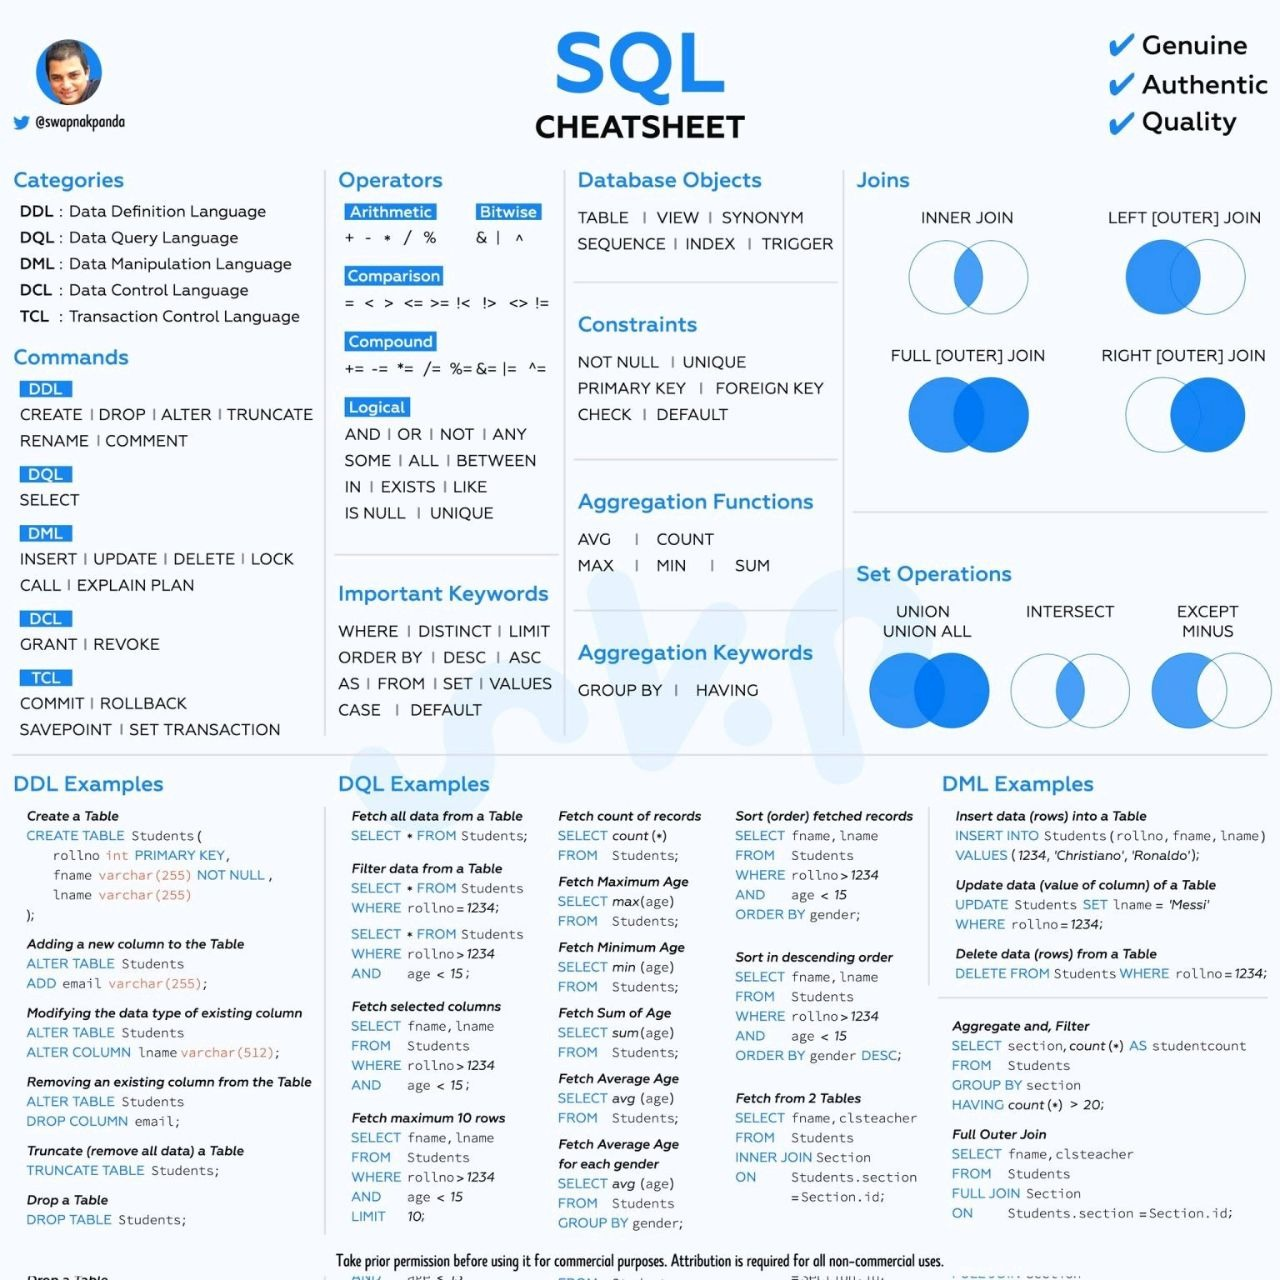